In [44]:
# Set proper path
import os
current_dir = os.getcwd()
if "notebooks" in current_dir:
    current_dir = os.chdir("../")

from src.models.train_model import load_dataset, load_model
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import scipy.ndimage as ndimage

In [28]:
# Load dataset
model = load_model("final5", "ImprovedCNN")#load_model("Improved_CNN", "ImprovedCNN")
model.eval()

Model 'final5' loaded with architecture 'ImprovedCNN'


ImprovedCNN(
  (conv1): Conv2d(5, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (activation): Sigmoid()
  (dropout): Dropout(p=0.25, inplace=False)
)

In [29]:
test_data = load_dataset(2, "eval")
images, labels, _ = next(iter(test_data))
model.to("cuda")
images = images.to("cuda")
output = model(images)
output = output.cpu().detach().numpy()
images = images.cpu().detach().numpy()

In [9]:
# Get error for each image
error = np.zeros(len(output))
for i in range(len(output)):
    error[i] = np.linalg.norm(output[i] - labels[i].numpy())

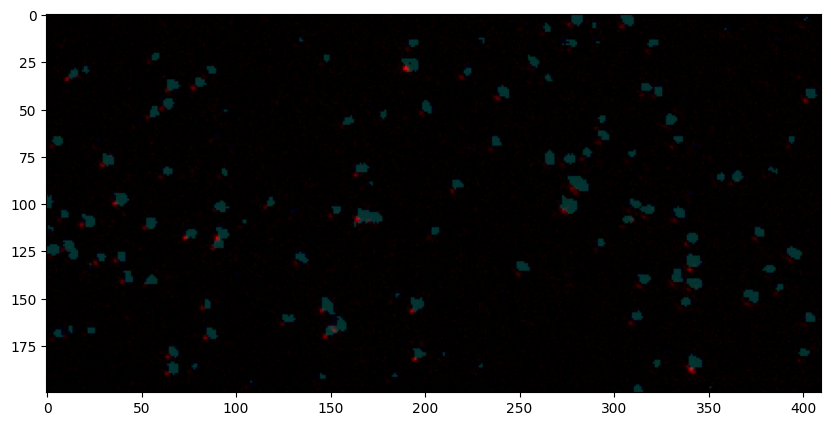

In [36]:

# Plot image and prediction
plt.figure(figsize=(10, 10))
#plt.subplot(3, 1, 1)
img = images[0,1:4].transpose(1,2,0)
img[:,:,1] = (images[0,2,:,:]>30/255)*0.2 
img[:,:,2] = output[0,0]*0.2 
plt.imshow(img)
plt.show()

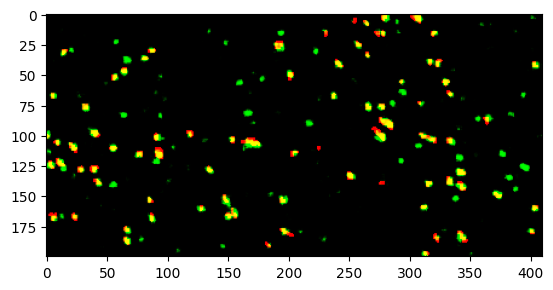

In [22]:
img [:,:,0] = labels[0,0].numpy()
img [:,:,1] = output[0,0]#labels[0,0].numpy()
img[:,:,2] = 0

plt.imshow(img)
plt.show()

In [52]:
# Load dataset
model = load_model("final6", "ImprovedCNN")#load_model("Improved_CNN", "ImprovedCNN")
model.eval()

Model 'final6' loaded with architecture 'ImprovedCNN'


ImprovedCNN(
  (conv1): Conv2d(5, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (activation): Sigmoid()
  (dropout): Dropout(p=0.25, inplace=False)
)

In [38]:
test_data = load_dataset(2, "eval")
images, labels, _ = next(iter(test_data))
model.to("cuda")
images = images.to("cuda")
output = model(images)
output = output.cpu().detach().numpy()
images = images.cpu().detach().numpy()

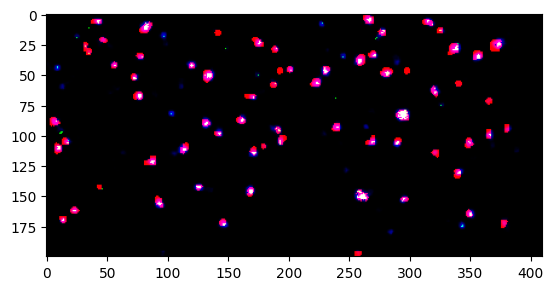

In [39]:
img [:,:,0] = labels[0,0].numpy()
img [:,:,1] = images[0,2,:,:]>30/255 #0#output[0,0]#labels[0,0].numpy()
img[:,:,2] = output[0,0]

plt.imshow(img)
plt.show()

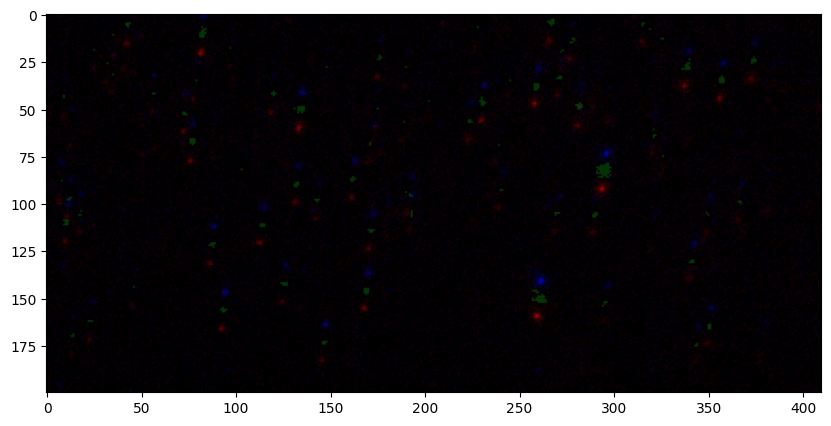

In [40]:
# Plot image and prediction
plt.figure(figsize=(10, 10))
#plt.subplot(3, 1, 1)
img = images[0,1:4].transpose(1,2,0)
img[:,:,1] = (images[0,2,:,:]>30/255)*0.2

plt.imshow(img)
plt.show()

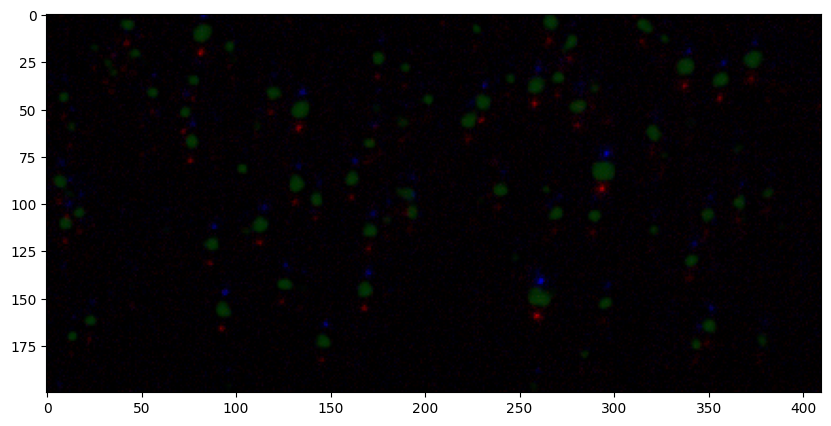

In [43]:
# Plot image and prediction
plt.figure(figsize=(10, 10))
#plt.subplot(3, 1, 1)
img = images[0,1:4].transpose(1,2,0)
img[:,:,1] = output[0,0]*0.2

plt.imshow(img)
plt.show()

In [45]:
def load_sample_image(batch, cam, frame):
    # Load images
    for i in range(0, 5):
        # Load png as torch tensor
        img = plt.imread("data/interim/batch" + str(batch) + "/cam" + str(cam) + "/B" + str(frame + i).zfill(5) + ".png")
                        #+ "/cam" + "3" + "/B" + str(50 + i - 2).zfill(5) + ".png")
        
        if i == 0:
            image_series = torch.zeros(5, img.shape[0], img.shape[1])

        img = torch.from_numpy(img)
        img = img.unsqueeze(0)

        image_series[i, :, :] = img

    return image_series.unsqueeze(0)

In [46]:
def draw_squares(mask, scale_radius=1, edgecolor='r'):

    # Label connected components in the mask
    labels, num_labels = ndimage.label(mask)

    # Calculate the Euclidean distance transform of the labeled mask
    distances = ndimage.distance_transform_edt(mask)

    # Find the maximum position (centroid) of each labeled component
    centroids = ndimage.maximum_position(distances, labels, range(1, num_labels + 1))

    # Calculate the radius that surrounds all the points in the grouping
    max_distance = distances.max()
    radius = (max_distance*2 + 1) * scale_radius

    # Plot rectangles for each centroid
    for centroid in centroids:
        x = centroid[1] - radius
        y = centroid[0] - radius
        width = 2 * radius
        height = 2 * radius
        rectangle = Rectangle((x, y), width, height, facecolor='none', edgecolor=edgecolor)
        plt.gca().add_patch(rectangle)
    
    return num_labels

In [47]:
def plot_found_particles(mask, img = None, threshold_value=0.1, **kwargs):

    if img is None:
        img = mask
    
    mask = mask > threshold_value
    # Plot the mask
    plt.figure(figsize=(15, 15))
    plt.imshow(img, cmap='gray')

    num_labels = draw_squares(mask, **kwargs)
    plt.axis("off")
    plt.title(f"Found {num_labels} particles")

In [ ]:
plot_found_particles(prediction[batch, 0, :, :], img=input_image, threshold_value=0.01, scale_radius=0.5)
plt.show()

In [50]:
data_loader = load_dataset(2, "inference") 
sample_image, sample_mask, image_info = next(iter(data_loader))

In [55]:
sample_image.to("cuda")
model.eval()
output = model(sample_image)

In [56]:
sample_image = sample_image.numpy()
#sample_mask = sample_mask.numpy()
prediction = output.detach().numpy()


In [57]:
input_image = sample_image[0, 2, :, :]
input_image = np.clip(input_image, 0, 0.5)

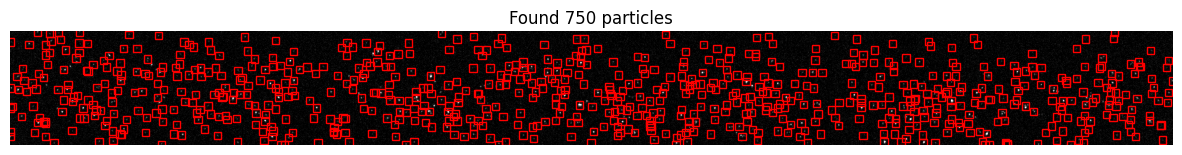

In [58]:
plot_found_particles(prediction[0, 0, :, :], img=input_image, threshold_value=0.01, scale_radius=0.5)
plt.show()

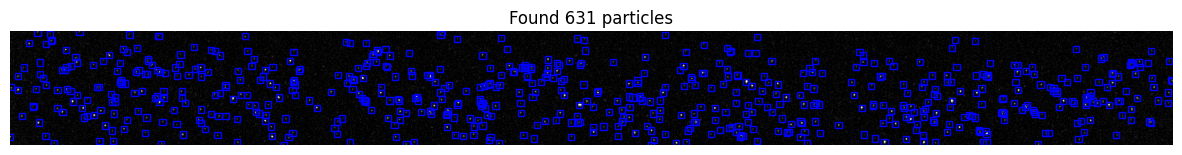

In [59]:
plot_found_particles(sample_image[0, 2, :, :], img=input_image, threshold_value=30/255, edgecolor='b')

plt.show()

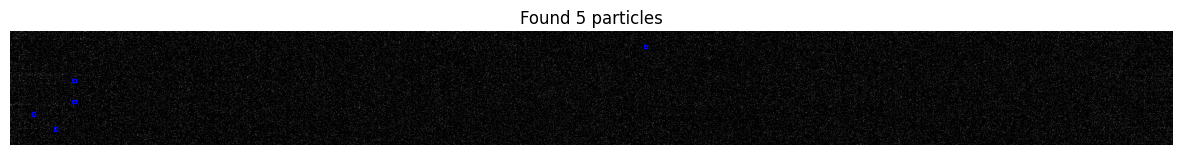

In [65]:
no_particles = load_sample_image(4, 3, 11)
plot_found_particles(no_particles[0,2,:,:], img=no_particles[0,2,:,:], threshold_value=30/255, edgecolor='b')

In [72]:
count_threshold = []
count_model = []
model.eval()
for i in range(4):
    for j in range(1, 97):
        no_particles = load_sample_image(4, i, j)

        _, num_labels = ndimage.label(no_particles[0,2,:,:] >= 30/255)
        count_threshold.append(num_labels)

        no_particles.to("cuda")
        output = model(no_particles)
        prediction = output.detach().numpy()
        _, num_labels = ndimage.label(prediction[0,0,:,:] >= 0.01)
        count_model.append(num_labels)

        if j % 10 == 0:
            print(f"Cam {i}, frame {j}")




Cam 0, frame 10
Cam 0, frame 20
Cam 0, frame 30
Cam 0, frame 40
Cam 0, frame 50
Cam 0, frame 60
Cam 0, frame 70
Cam 0, frame 80
Cam 0, frame 90
Cam 1, frame 10
Cam 1, frame 20
Cam 1, frame 30
Cam 1, frame 40
Cam 1, frame 50
Cam 1, frame 60
Cam 1, frame 70
Cam 1, frame 80
Cam 1, frame 90
Cam 2, frame 10
Cam 2, frame 20
Cam 2, frame 30
Cam 2, frame 40
Cam 2, frame 50
Cam 2, frame 60
Cam 2, frame 70
Cam 2, frame 80
Cam 2, frame 90
Cam 3, frame 10
Cam 3, frame 20
Cam 3, frame 30
Cam 3, frame 40
Cam 3, frame 50
Cam 3, frame 60
Cam 3, frame 70
Cam 3, frame 80
Cam 3, frame 90


In [73]:
mean_thr = np.mean(count_threshold)
mean_mod = np.mean(count_model)

print(f"Mean threshold: {mean_thr}")
print(f"Mean model: {mean_mod}")

Mean threshold: 4.9765625
Mean model: 3.1510416666666665


In [74]:
data_loader = load_dataset(1, "inference")
N = len(data_loader)
count_particles_threshold = []
count_particles_model = []
model.eval()
for i, (sample_image, sample_mask, image_info) in enumerate(data_loader):
    
    _, num_labels = ndimage.label(sample_image[0, 2, :, :] >= 30/255)
    count_particles_threshold.append(num_labels)

    sample_image.to("cuda")
    output = model(sample_image)
    prediction = output.detach().numpy()
    _, num_labels = ndimage.label(prediction[0,0,:,:] >= 0.01)
    count_particles_model.append(num_labels)

    if i % 10 == 0:
        print(f"Frame {i}/{N}")

Frame 0/3152
Frame 10/3152
Frame 20/3152
Frame 30/3152
Frame 40/3152
Frame 50/3152
Frame 60/3152
Frame 70/3152
Frame 80/3152
Frame 90/3152
Frame 100/3152
Frame 110/3152
Frame 120/3152
Frame 130/3152
Frame 140/3152
Frame 150/3152
Frame 160/3152
Frame 170/3152
Frame 180/3152
Frame 190/3152
Frame 200/3152
Frame 210/3152
Frame 220/3152
Frame 230/3152
Frame 240/3152
Frame 250/3152
Frame 260/3152
Frame 270/3152
Frame 280/3152
Frame 290/3152
Frame 300/3152
Frame 310/3152
Frame 320/3152
Frame 330/3152
Frame 340/3152
Frame 350/3152
Frame 360/3152
Frame 370/3152
Frame 380/3152
Frame 390/3152
Frame 400/3152
Frame 410/3152
Frame 420/3152
Frame 430/3152
Frame 440/3152
Frame 450/3152
Frame 460/3152
Frame 470/3152
Frame 480/3152
Frame 490/3152
Frame 500/3152
Frame 510/3152
Frame 520/3152
Frame 530/3152
Frame 540/3152
Frame 550/3152
Frame 560/3152
Frame 570/3152
Frame 580/3152
Frame 590/3152
Frame 600/3152
Frame 610/3152
Frame 620/3152
Frame 630/3152
Frame 640/3152
Frame 650/3152
Frame 660/3152
Frame 

In [75]:
mean_thr = np.mean(count_particles_threshold)
mean_mod = np.mean(count_particles_model)

print(f"Mean threshold: {mean_thr}")
print(f"Mean model: {mean_mod}")

Mean threshold: 388.92671319796955
Mean model: 416.3845177664975


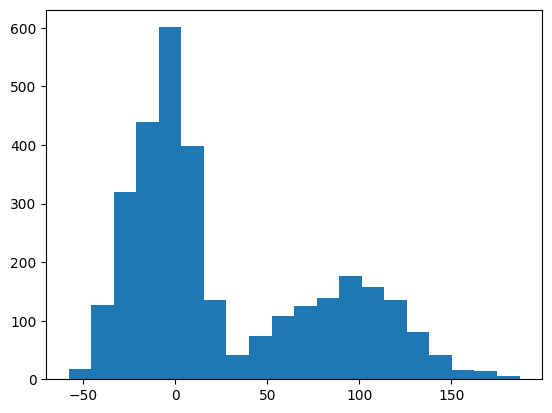

In [78]:
plt.hist(np.array(count_particles_model) - np.array(count_particles_threshold), bins=20)
plt.show()

In [89]:
from scipy.stats import ks_2samp
statistic1, p_value1 = ks_2samp(count_particles_model, count_particles_threshold)
statistic2, p_value2 = ks_2samp(count_threshold, count_model)

print(f"KS test for model vs threshold: {statistic1}, {p_value1}")
print(f"KS test for model vs model: {statistic2}, {p_value2}")

KS test for model vs threshold: 0.22684010152284265, 1.8076421687711734e-71
KS test for model vs model: 0.3046875, 3.9024765963057906e-16


In [66]:
no_particles.to("cuda")
no_particles_out = model(no_particles)

no_particles_out = no_particles_out.to('cpu').detach().numpy()
no_particles = no_particles.to('cpu').detach().numpy()

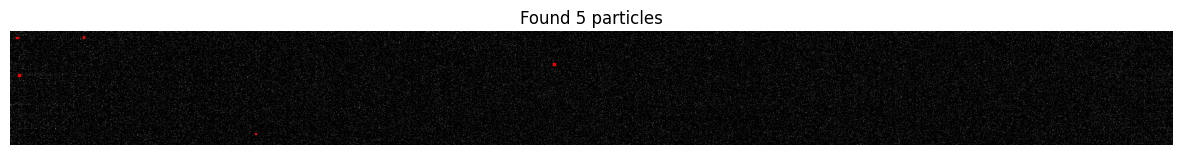

In [67]:
plot_found_particles(no_particles_out[0, 0, :, :], img=no_particles[0,2,:,:], threshold_value=0.01, scale_radius=0.5)

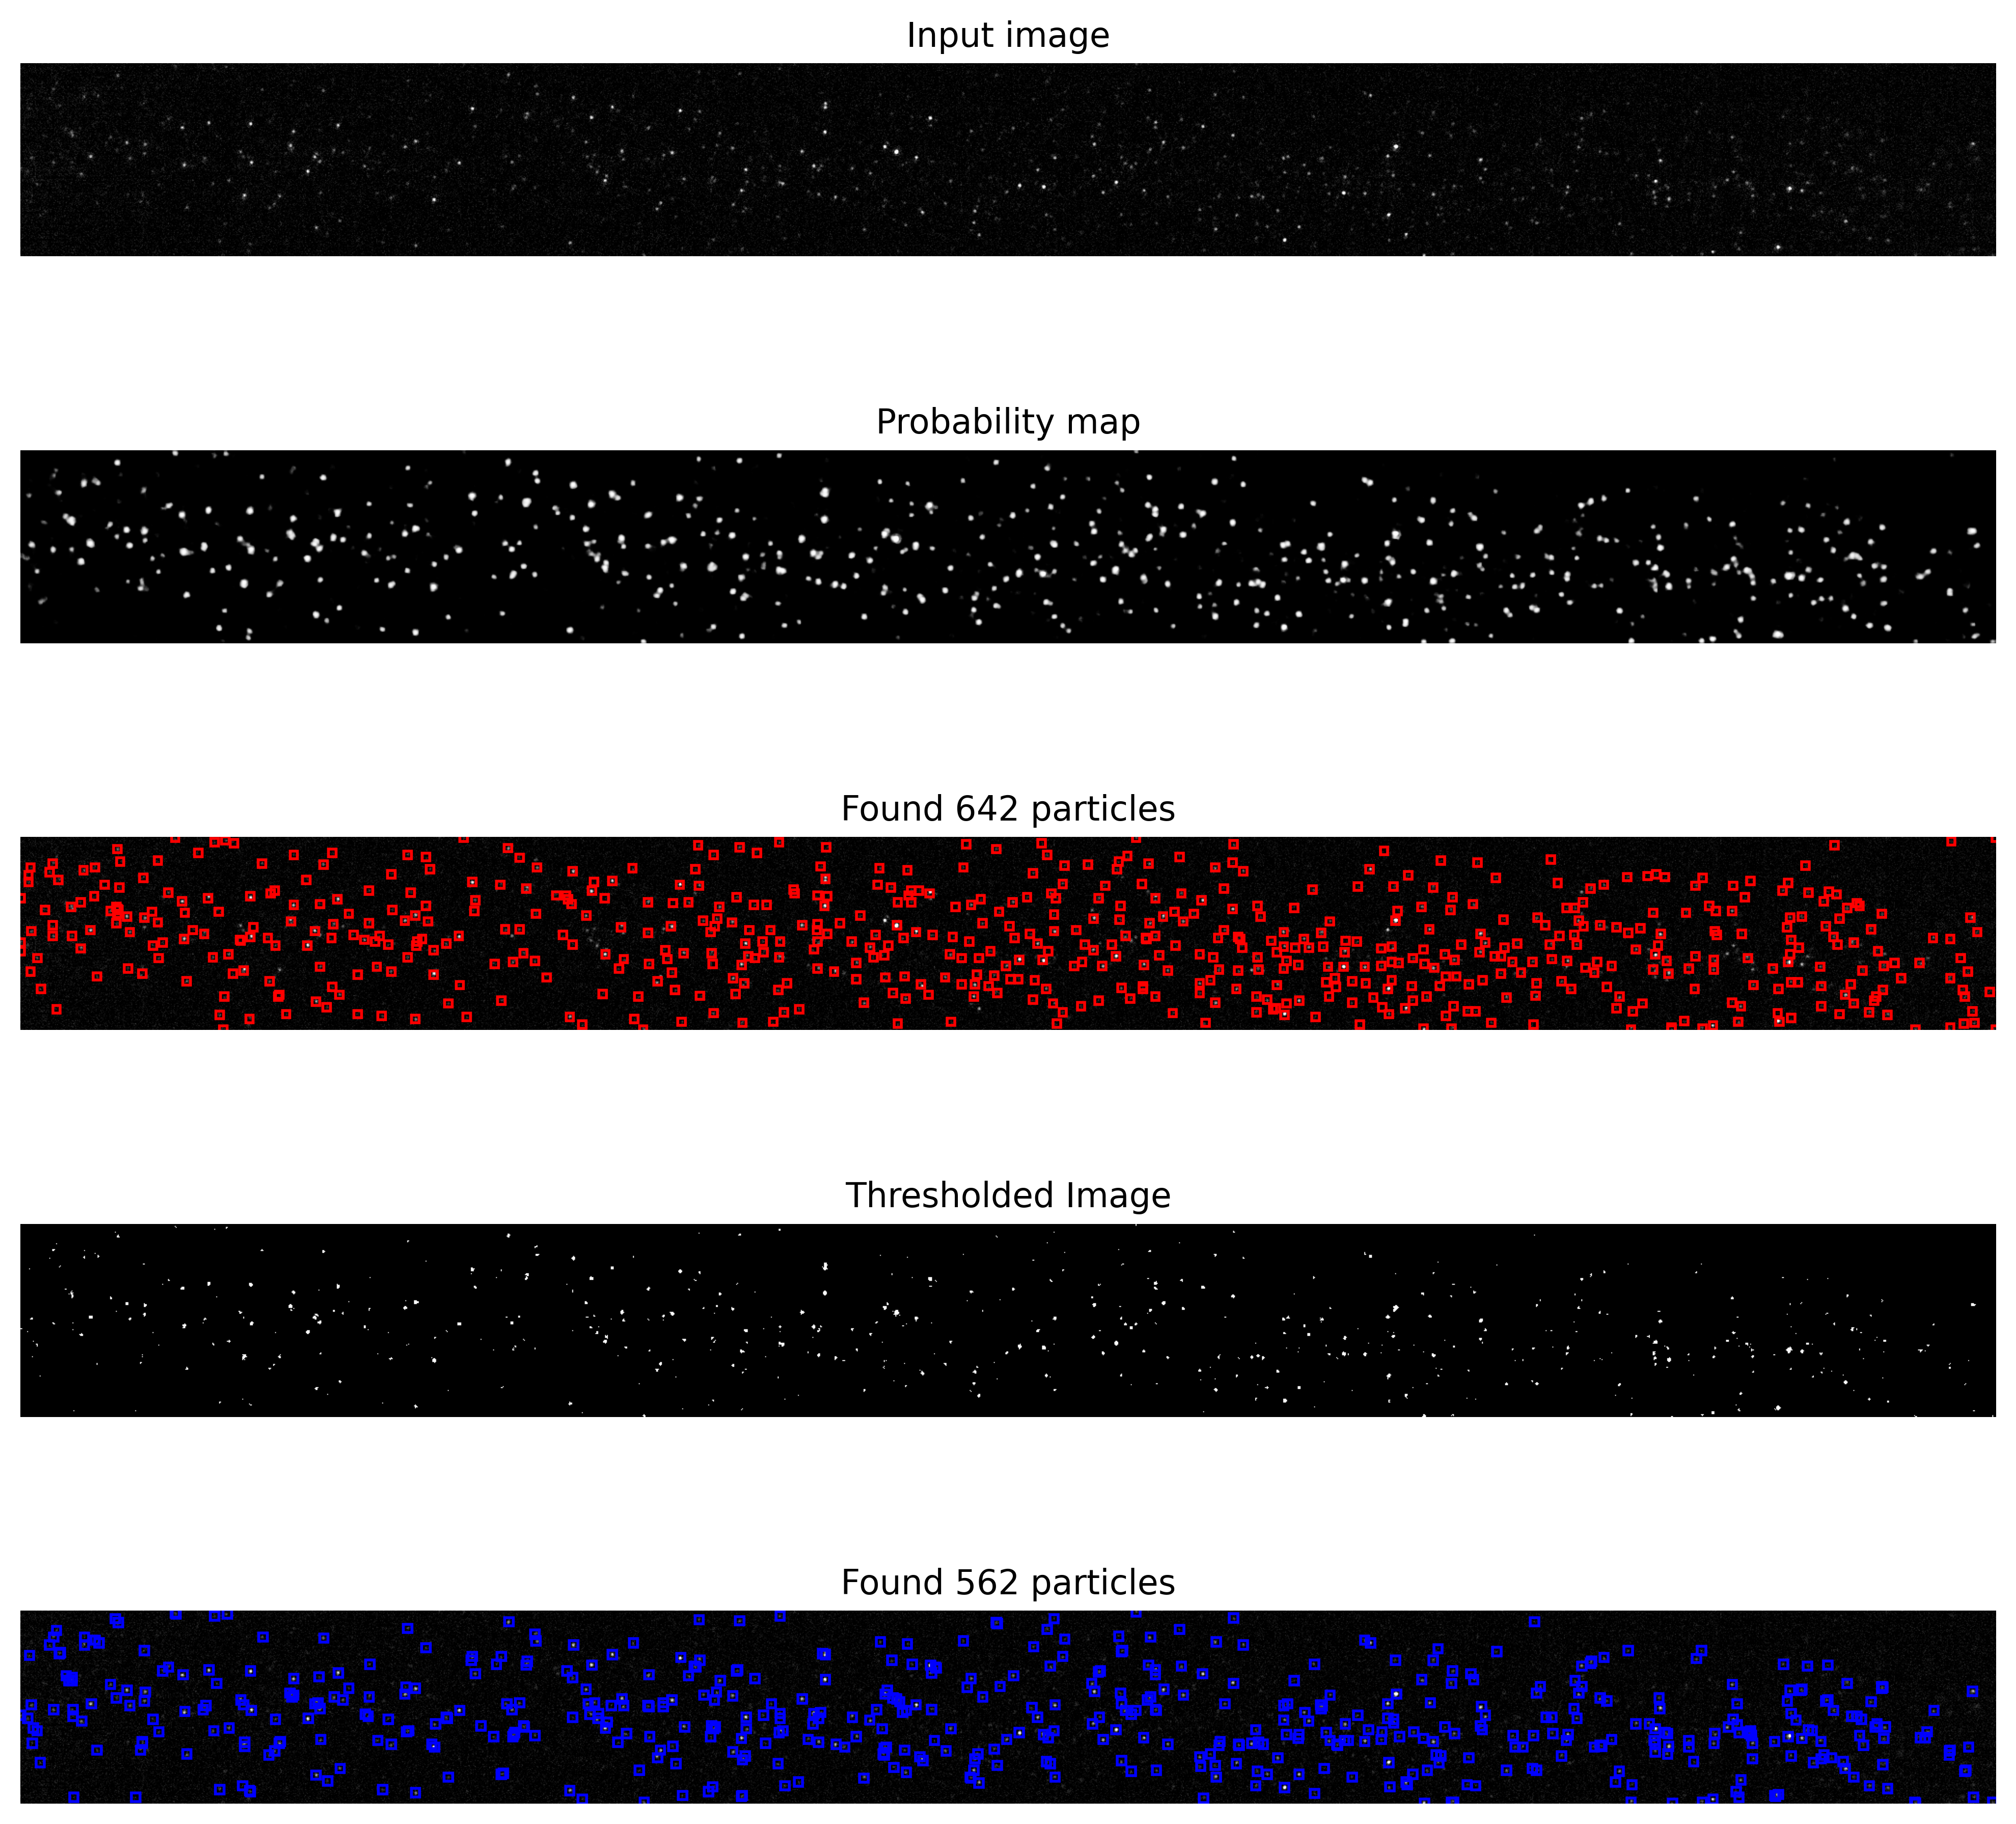

In [101]:
display_img = sample_image[0, 2, :, :]
display_img = np.clip(display_img, 0, 0.5) * 2
batch = 0

plt.figure(figsize=(10, 10), dpi=400)
plt.subplot(5, 1, 1)
plt.imshow(display_img, cmap="gray")
plt.title("Input image")
plt.axis("off")
plt.subplot(5, 1, 2)

plt.imshow(prediction[batch, 0, :, :], cmap="gray")
plt.title("Probability map")
plt.axis("off")
#plt.colorbar()
plt.subplot(5, 1, 3)

# Plot the mask
#plt.figure(figsize=(15, 15))
plt.imshow(display_img, cmap='gray')

num_labels = draw_squares(prediction[batch, 0, :, :]> 0.01, scale_radius=0.3)
plt.axis("off")
plt.title(f"Found {num_labels} particles")
plt.subplot(5, 1, 4)
threshold_value = 30/255
thresholded_image = sample_image > threshold_value
plt.imshow(thresholded_image[batch, 2, :, :], cmap="gray")
plt.axis("off")
plt.title("Thresholded Image")

plt.subplot(5, 1, 5)
plt.imshow(display_img, cmap='gray')
num_labels = draw_squares(thresholded_image[batch, 2, :, :], scale_radius=0.8, edgecolor='b')
plt.axis("off")
plt.title(f"Found {num_labels} particles")
plt.tight_layout()

plt.savefig('reports/figures/compare.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [97]:
(1- 3.151 / 4.98)*100

36.7269076305221

In [100]:
(416.89 / 388.93- 1)*100

7.188954310544315

In [99]:
416.89 / 388.93

1.0718895431054432